# Logistic Regression for 
Fake Advertising. 

In this project we will be working with a fake advertising data set, the objetive is indicating whether or not a internet user clicked on an fake advertisement.

We will create a model that will predict whether or not they will click on an ad based off the features of particucular user.

Data Description:

* 'Daily Time Spent on Site': (Float) time consumer on site in Minutes.
* 'Age': (Integer) cutomer age in Years.
* 'Area Income': (Float) Avg. Income of geographical area of user.
* 'Daily Internet Usage':  (Float) Avg. minutes a day user is on the web.
* 'Ad Topic Line': (String) Headline of the advertisement.
* 'City': (String) City of consumer
* 'Male': (Boolean) 1 if user is male 0 another case.
* 'Country': (String) Country of user.
* 'Timestamp': (Date) Time at which consumer clicked on Ad or close the window.
* 'Clicked on Ad': (Boolean) 1 if user clicked in Ad 0 not clicked in Ad.

In [1]:
# Import libraries for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline save plots in notebook. 
%matplotlib inline

### Import the Data.

In [14]:
advert = pd.read_csv('data/advertising.csv')
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Show the data in genera (with .info() and .describe()).

In [15]:
advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [16]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Exploratory Data Analysis

<AxesSubplot:ylabel='Frequency'>

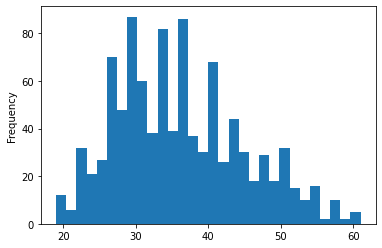

In [17]:
# Plot a Histogram of Age distribution in dataset.
advert['Age'].plot.hist(bins=30)

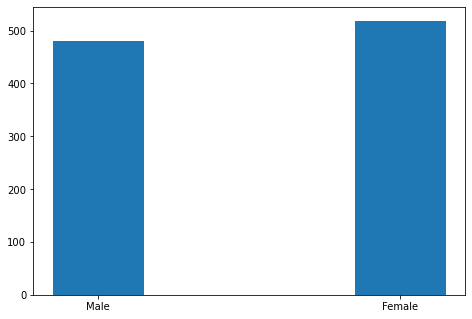

In [36]:
# Plot a Barplot of gender in dataset.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
frecuency = [sum(advert["Male"]==1), sum(advert["Male"]==0)]
ax.bar(gender,frecuency, width=0.3)
plt.show()

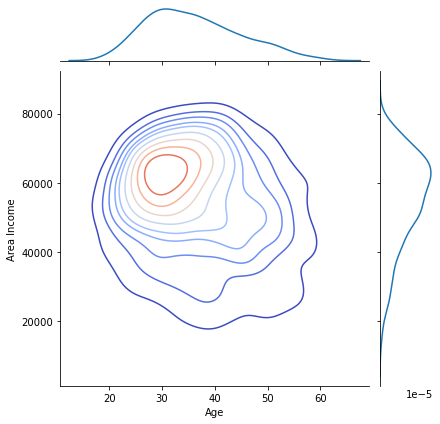

In [32]:
# Plot a Jointplot and show Age vs Area Income.
sns.jointplot(x='Age',y='Area Income',data=advert, kind='kde', cmap='coolwarm')

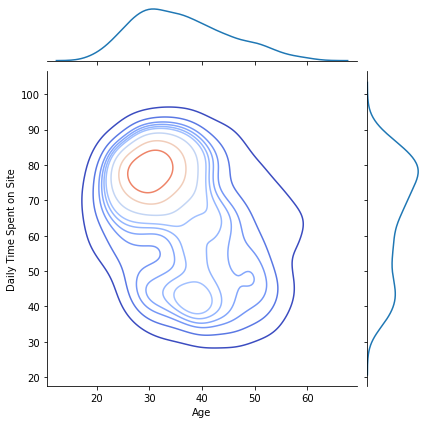

In [46]:
# Plot a Jointplot and show Age vs Daily Time spent.
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=advert,kind='kde',cmap='coolwarm')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

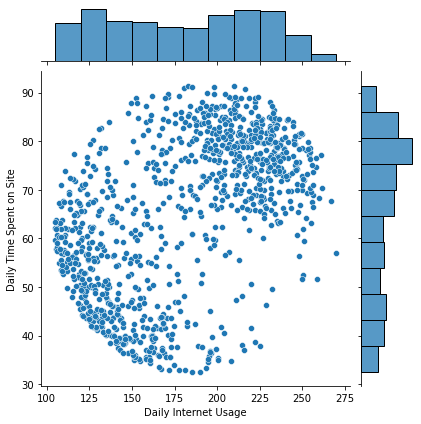

In [48]:
# Plot a Jointplot and show Daily Internet Usage vs Daily Time Spent on Site.
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=advert,cmap='coolwarm')

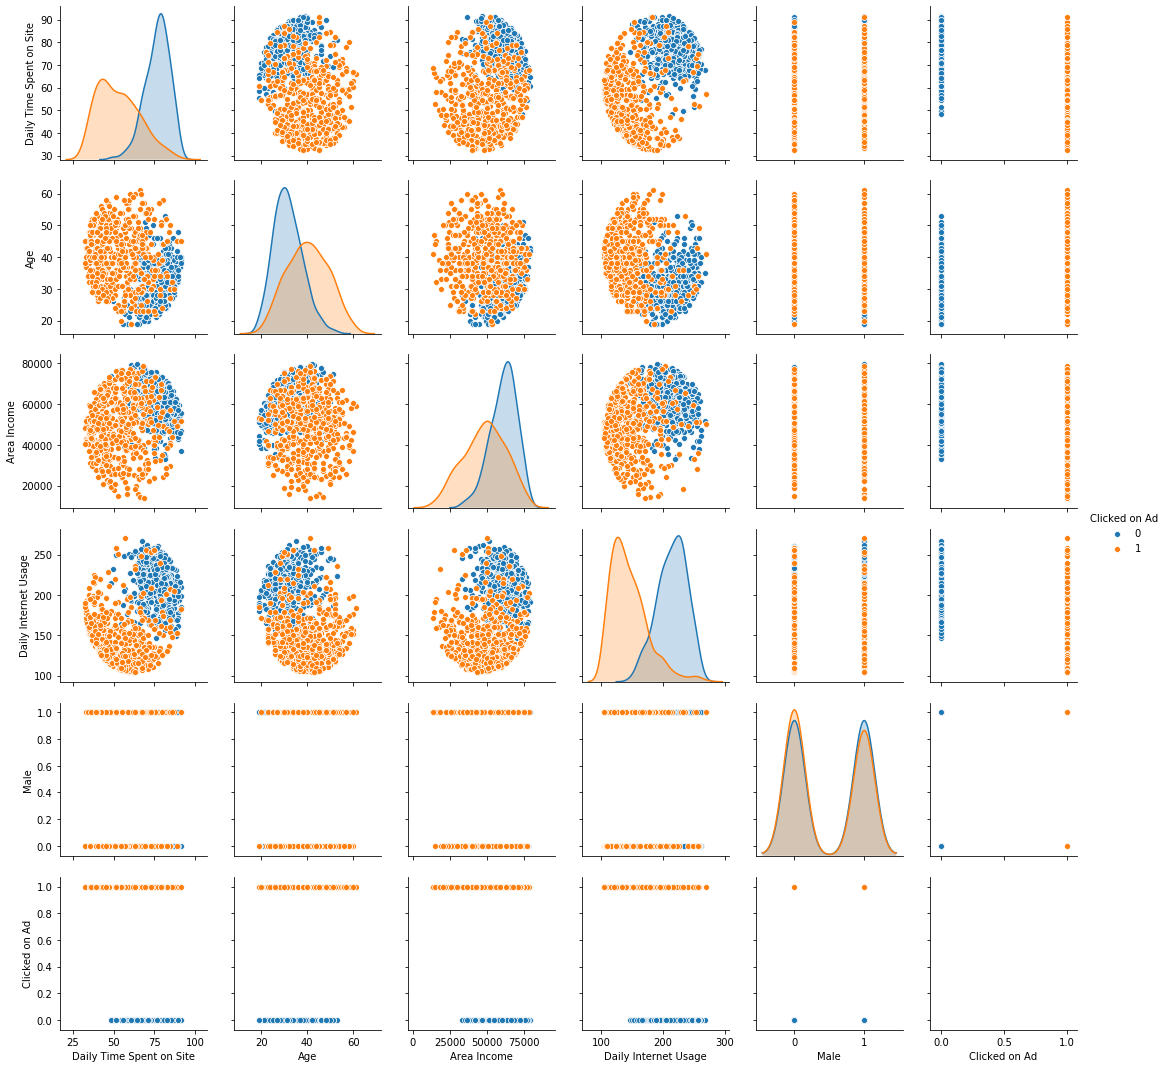

In [20]:
# To resume, will create a pairplot of all variables by output variable "Clicked on Ad'" 
sns.pairplot(advert,hue='Clicked on Ad')

### Logistic Regression Model.

** Split the data into training set and testing set using train_test_split**

In [50]:
# Show data to evaluate variables.
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [51]:
# First need set train and test data for training model and evaluate presicion respectively.
from sklearn.model_selection import train_test_split
# About the data to train we will exclude variables how "ad topic line", "city", "country" and "timestramp"
# because need feature engineering, if the model have bad presicion we evaluate work with this data.
X = advert[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = advert['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
# Import model from sklearn and create instance.
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()
# Fit the model with train data.
logm.fit(X_train,y_train)

LogisticRegression()

### Predictions and Evaluations

In [53]:
# Now predict values for the testing data.
predict = logm.predict(X_test)

c:\Users\Sebastian\anaconda3\envs\DataAnalysis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


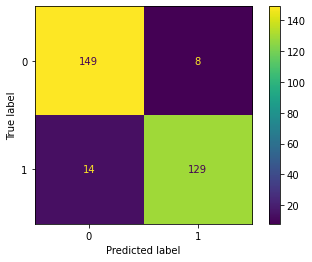

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [54]:
# Create a Confusion Matrix and Classification Report to evaluate presicion of fit model.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logm, X_test, y_test)  
plt.show()
print(classification_report(y_test,predict))

#### Predictions have a good presicion, itn't neccessary use other variables to model.